In [3]:
import requests #Get the HTML code
from bs4 import BeautifulSoup #Tidy up the code
from collections import Counter #Counter to count occurances of each word
import matplotlib.pyplot as plt #graph plotting


class wiki:

    #the main features of cleaning the wiki site and whether the site is valid is run in __init__
    
    def __init__(self, title,b='No'): 
        self.title = str(title.title()) #title on LHS is variable input, RHS is function for proper case/title case
        self.title = str(self.title.replace(" ", "_")) #Convert spaces to _ as is Wikipedia page format
        self.url = str('https://en.wikipedia.org/wiki/') + self.title #combine the two to get full URL
        self.page = requests.get(self.url) #retrieve HTML info from site
        self.contents = self.page.content 
        self.soup = BeautifulSoup(self.contents, 'html.parser') #Parse the HTML nicely with formatting
        
        #some unused variables
        self.b = 100
        self.c = 100
        if b != 100:
            self.b = b
        if c != 100:
            self.c = c
        
        self.trancetext = self.soup.find_all('p') #obtain all paragraphs starting with tag <p>
        self.trancetext2 = self.soup.find_all('li') #obtain all paragraphs starting with tag <li>

        #get paragraphs from trancetext with special format into a list
        self.para=[]
        for paragraph in self.trancetext: #append paragraphs starting with <p>
            self.para.append(paragraph)

        self.relatedtopic = ",*RELATED WIKI TOPIC*" #to add to points with a link and are on sidebar
        for paragraph in self.trancetext2: #append paragraphs starting with <li>
            if str(paragraph).find('<li><a href=') != -1:
                if str(paragraph).find('</a></li>') != -1 or str(paragraph).find('</a></sup></li>') != -1: 
                    self.para.append(self.relatedtopic)
            if str(paragraph).find('toctext') == -1: #remove Wiki headers 1.2.3 with toctext as they can't be arranged properly
                self.para.append(paragraph)
    
        #REASON WHY WE HAVE TO DO TWO FOR LOOPS WITH TWO TRANCETEXT IS BECAUSE THE FIND_ALL FOR ARRAY IS NOT IN ORDER
        #COMMENCE CLEANING OF NONSENSE HTML <> and WIKI LINK [no]
        
        #For FIXING the summary function
        self.troubleshoot = self.para
        
        self.para = list(str(self.para)) #chop everything into letters for cleaning
        
        #This block of code removes the first letter [, removes any words with <> html tag or [] citation
        #When it detects a <li> it will create two blanks
        self.start = 0 #is letter currently inside tag <>
        self.end = 0 #has <> just ended, need to check for , if it just ended to not copy a comma after <>
        self.first = 1 #first letter is [, need to omit
        self.bracket = 0 #check if letter is inside bracket
        self.li = 0 #check for <li> to line break
        self.p = 0 #check for <p> to line break
        self.point = 0 #after <li>, puts a • before adding new letter
        self.para2 = []
        for letter in self.para:
            if self.first == 0:
                if letter == '<': #tells python to stop reading letters inside a bracket
                    self.start = 1
                elif letter == '>': #next letter can be read since its out of bracket, unless its another <
                    self.start = 0
                    self.end = 1
                elif self.end == 1 and letter == ',': #skip COMMA reading when it occurs like </p>, at end of para
                    self.end = 0
                    continue
                elif letter == '[':
                    self.bracket = 1
                    self.end = 0
                elif letter == ']':
                    self.bracket = 0
                    self.end = 0
                elif self.start == 0 and self.bracket == 0: #ALL CLEAR TO READ LETTER
                    self.end = 0
                    if self.point == 1:
                        self.para2.append('• ')
                        self.point = 0
                    self.para2.append(letter)
            if letter == '<':
                self.li = 1
            elif letter != 'l' and self.li == 1:
                self.li = 0
            elif letter == 'l' and self.li == 1:
                self.li = 2
            elif letter == 'i' and self.li == 2:
                self.li = 3
            elif letter != '>' and self.li == 3:
                self.li = 0
            elif letter == '>' and self.li == 3:
                self.para2.append('\n\n')
                self.li = 0
                self.point = 1
            if letter == '<':
                self.p = 1
            elif letter != 'p' and self.p == 1:
                self.p = 0
            elif letter == 'p' and self.p == 1:
                self.p = 2
            elif letter == '>' and self.p == 2:
                self.para2.append('\n')
                self.p = 0
            self.first = 0 #Had an issue with the first letter being [, after skipping this, the [number] checks can run

        self.para2=''.join(self.para2) #combine back all letters and spaces
        #REMOVE UNWANTED ARRAYS
        self.para1 = []
        
        
        #WORD COUNT (SELF.PARA3) AND COMMON WORDS (SELF.TRANCECOUNTER)
        
        self.para3 = self.para2.split() #split paragraphs into words again for counting
        self.niceword = ''
        self.punctuation = ['.',',','(',')','"',"'",'?','!','*']
        for index, word in enumerate(self.para3):
            self.niceword = word
            self.niceword = self.niceword.lower() #standardize all to lower case before counting
            for punctuation in self.punctuation:
                self.niceword = self.niceword.replace(punctuation,'') #clean up bad punctuation
            self.para3[index] = self.niceword 
        self.trancecounter = Counter(self.para3) 
        #counter solely used for word count, cannot be used as banlist not implemented yet. 
        #Make new trancecounter2+banlist for use
        self.allwords = dict(self.trancecounter.most_common()) 
        #convert to dictionary so that for loop can extract words + do unique word count + total word count
        
        self.trancelist = [] #full list of words to fill up, cannot be used yet as banlist not implemented
        
        #FIND OUT UNIQUE WORD COUNT AND TOTAL WORD COUNT BEFORE BANLIST
        self.fullcount = 0
        self.fullwords = 0
        for key in self.allwords:
            self.fullcount += self.allwords[key]
            self.fullwords += 1
            self.trancelist.append(key)
        
        #IMPLEMENT BAN LIST (FROM WIKIPEDIA) BY DEL FUNCTION FOR COUNTER TRANCECOUNT AND WORD LIST SELF.TRANCELIST
        banlist = ['the', 'be', 'to', 'of', 'and', 'a', 'in', 'that', 'have', 'I', 'it', 'for', 'not', 'on', 'with', 
                   'he', 'as', 'you', 'do', 'at', 'this', 'but', 'his', 'by', 'from', 'they', 'we', 'say', 'her', 'she', 
                   'or', 'an', 'will', 'my', 'one', 'all', 'would', 'there', 'their', 'what', 'so', 'up', 'out', 'if', 
                   'about', 'who', 'get', 'which', 'go', 'me', 'when', 'make', 'can', 'like', 'time', 'no', 'just', 
                   'him', 'know', 'take', 'people', 'into', 'year', 'your', 'good', 'some', 'could', 'them', 'see', 
                   'other', 'than', 'then', 'now', 'look', 'only', 'come', 'its', 'over', 'think', 'also', 'back', 
                   'after', 'use', 'two', 'how', 'our', 'work', 'first', 'well', 'way', 'even', 'new', 'want','topic', 
                   'because', 'any', 'these', 'give', 'day', 'most', 'us','retrieved','^','archived',"•",'related',
                   "',*related","wiki","topic*',","is","are",'was','since','such','articles','has','&amp;','p','b',
                  'january','february','march','april','may','june','july','august','september','october','november',
                  'december']
        for word in banlist: #delete words in counter and list
            del self.trancecounter[word]
            self.allwords.pop(word, None)
            
        #FIND OUT TOTAL WORD COUNT AFTER BANLIST FOR FUNCTION COMMONWORDPCT THAT USES PERCENTAGE OF THRESHOLD FOR WORD COUNT
        self.fullcount2 = 0
        self.fullwords2 = 0
        
        self.trancelist2 = [] #NOT USED!!
        
        for key in self.allwords: #SELF.ALLWORDS HAVE WORDS REMOVED ON ITSELF VIA BANLIST, DONT NEED NEW VARIABLE
            self.fullcount2 += self.allwords[key] #FULLCOUNT2 used for COMMONWORDPCT and TOTAL WORDS function to show total word count aft removing banlist
            self.fullwords2 += 1 #FULLWORDS2 used in TOTAL WORDS function to show unique word count aft removing banlist
            self.trancelist2.append(key) #NOT USED!!!
        
        
        #This section checks if the Wiki site was loaded successfully..
        self.missing = self.soup.find_all('b') 
        #Wikipedia does not have an article with this exact name.
        #This sentence that always appears for Error 404 pages, is bolded, so <b> tag can help to find it
                
        #Check for sentence that tells of Error 404 website using a counter.
        self.goodsite = 1
        self.offsite = 0
        
        for sentence in self.trancetext: #check if a site goes through but it is an ambiguous site (recommendations page)
            #refer to: phrase belongs in a <p> paragraph
            if str(sentence).find("refer to:") != -1:
                self.offsite = 1            
        
        for sentence in self.missing: #RUN THROUGH EVERY ELEMENT IN LIST
            if str(sentence) == "<b>Wikipedia does not have an article with this exact name.</b>": #CONVERT ELEMENT TO STRING TYPE BEFORE CHECK!!!
                self.goodsite = 0 #sentence exists, bad site means counter flips to 0
        
        if self.goodsite == 1 and self.offsite == 0:
            print('Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.')
        elif self.goodsite == 1 and self.offsite == 1:
            print('\nThe title "'+ self.title.replace("_", " ") + '" you specified is ambiguous. As a result, you are linked to a clarification page.\n\n')
            print('Here are some suggestions to use: \n')
            
            self.all_links = self.soup.find_all("a") #ALL HTML TAGS STARTING WITH <A, E.G. <A HREF, <A TITLE AND FULL PARAGRAPH
            self.wiktwords = []
            for link in self.all_links:
                self.wiktwords.append(link.get("title")) #TAG STARTING WITH A, CONTENT ENCLOSED INSIDE TITLE=""
                #print(link.get("title")) #shows list of items appended, common words all start with wikt:

            self.cleanlink = []
            for words in self.wiktwords: 
                self.words2 = str(words) #words are not string yet so need str function before saving into new var
                if self.words2.find("wiktionary:") != -1:
                    self.tempsliceword = list(str(self.words2))
                    self.newword = []
                    self.x = 0
                    for letter in self.tempsliceword:
                        if self.x > 10:
                            self.newword.append(letter)
                        self.x += 1
                    self.cleanword = ''.join(self.newword)
                    self.cleanlink.append(self.cleanword)
                elif self.words2 != 'None':
                    self.cleanlink.append(self.words2)

            for link in self.cleanlink:
                if link.find("Help:") != -1:
                    break
                elif link.find("Edit section:") != -1:
                    continue
                else:
                    print(link)
            
        else:
            print('Wikipedia page could not be found for "' + str(self.title.replace("_", " ")) + '". Please try again!') 
            print('Other useful information: Enclose title argument with single quotes. Spaces are allowed, and title is case insensitive.')
        
    def whatthef(self): #remember to put self inside bracket
        print(self.b)
        print(self.c)
    
    def gettext(self): #comes after init
        print(self.para2)
        
    def commonwords(self,wordcount=100):
        self.wordcount = 100
        if wordcount != 100 and isinstance(wordcount, int) == True:
            self.wordcount = wordcount
        elif wordcount != 100 and isinstance(wordcount, int) == False:
            print('Word count specified is currently not an integer. Hence default of 100 words is used\n')
        #convert counter to list to dictionary then sum up total word count using for loop in word[key]
        self.topwords = dict(self.trancecounter.most_common(self.wordcount))
        print(self.topwords)
        
    def commonwordspct(self,percent=10):
        self.percent = 10
        if isinstance(percent, int) == True or isinstance(percent, float) == True:
            if percent != 10 and 0 < percent <= 100:
                self.percent = percent
        else:
            print('The percent specified is either not an integer or float, 0% or over 100% which is not allowed. Hence, 10% set by default.\n')
        
        self.wordcount2 = int(self.percent/100*self.fullcount2) #full count 2 is word count after banlist
        print(str(self.percent) + "% threshold means the most common words shown below appeared equal to or less than " + str(self.wordcount2) + ' times out of ' + str(self.fullcount2) + " total word count.\n")
        self.partialcount = 0
        self.partialtrancelist = []
        for key in self.allwords:
            self.partialcount += self.allwords[key]
            if self.partialcount <= self.wordcount2:
                self.partialtrancelist.append(key)
            else:
                break
        self.partialcounttowordno = 0
        for word in self.partialtrancelist:
            self.partialcounttowordno += 1
        self.topwords2 = dict(self.trancecounter.most_common(self.partialcounttowordno))
        if self.partialcounttowordno != 0:
            print('For the word count threshold, the ' + str(self.partialcounttowordno) + ' most common words are shown.\n\n')
            print(self.topwords2)
        else:
            print('The most common word has a percentage occurance higher than the threshold set as the percentage set is too low.\n')
    
    def totalwords(self): #word count are all BEFORE banlist
        print('Total word count is ' + str(self.fullcount))
        print('Total word count is ' + str(self.fullcount2) + ' after implementing banlist\n')
        print('Unique word count is ' + str(self.fullwords) + ' for the Wikipedia site titled ' + str(self.title.replace("_", " ")))
        print('Unique word count AFTER BANLIST is ' + str(self.fullwords2) + ' for the Wikipedia site titled ' + str(self.title.replace("_", " ")))
    
    def plotwords(self,wordcount2=20):
        self.wordcount2 = 20
        if wordcount2 != 20 and isinstance(wordcount2, int) == True:
            self.wordcount2 = wordcount2
        elif wordcount2 != 20 and isinstance(wordcount2, int) == False:
            print('Word count specified is currently not an integer. Hence default of 20 words is used for graph\n')
        #convert counter to list to dictionary then sum up total word count using for loop in word[key]
        self.topwords2 = dict(self.trancecounter.most_common(self.wordcount2))
        
        #matplotlib.pyplot.bar(range, height, tick_label)
        self.wordnames = list(self.topwords2.keys())
        self.wordvalues = list(self.topwords2.values())

        #tick_label does the some work as plt.xticks()
        plt.bar(range(len(self.topwords2)),self.wordvalues,tick_label=self.wordnames)
        plt.rcParams['figure.figsize'] = [22, 10]
        plt.figure(figsize=(22, 10), dpi= 80, facecolor='w', edgecolor='k')
        plt.savefig('bar.png')
        plt.show()
        
#         plt.bar(range(len(self.topwords2)), self.topwords2.values(), align='center')
#         plt.xticks(range(len(self.topwords2)), list(self.topwords2.keys()))
#         plt.show()
    

    def summary(self, paravalue=2):
        self.paravalue = 2
        if isinstance(paravalue, int) == True:
            if paravalue > 0:
                self.paravalue = paravalue
            else:
                print('The number of paragraphs specified is not valid. Default 2 paragraphs will be displayed \n')
        else:
            print('The number of paragraphs specified is not an integer. Default 2 paragraphs will be displayed \n')
        
        #MAKE AN ARRAY AND STRING FOR JUST 2 PARAGRAPHS!
        self.parashort = []
        self.noofpara = 0
        for paragraph in self.trancetext: #append ONLY 2 paragraphs starting with <p>
            if self.noofpara < self.paravalue and str(paragraph) != '<p class="mw-empty-elt">\n</p>' and len(str(paragraph)) > 199: 
                self.parashort.append(paragraph)
                self.noofpara += 1

        self.parashort = list(str(self.parashort)) #chop everything into letters for usage
        self.start = 0 #is letter currently inside tag <>
        self.end = 0 #has <> just ended, need to check for , if it just ended to not copy a comma after <>
        self.first = 1 #first letter is [, need to omit
        self.bracket = 0 #check if letter is inside bracket
        self.li = 0 #check for <li> to line break
        self.p = 0 #check for <p> to line break
        self.parashort2 = []
        for letter in self.parashort:
            if self.first == 0:
                if letter == '<': #tells python to stop reading letters inside a bracket
                    self.start = 1
                elif letter == '>': #next letter can be read since its out of bracket, unless its another <
                    self.start = 0
                    self.end = 1
                elif self.end == 1 and letter == ',': #skip COMMA reading when it occurs like </p>, at end of para
                    self.end = 0
                    continue
                elif letter == '[':
                    self.bracket = 1
                    self.end = 0
                elif letter == ']':
                    self.bracket = 0
                    self.end = 0
                elif self.start == 0 and self.bracket == 0: #ALL CLEAR TO READ LETTER
                    self.end = 0
                    self.parashort2.append(letter)
            if letter == '<':
                self.p = 1
            elif letter != 'p' and self.p == 1:
                self.p = 0
            elif letter == 'p' and self.p == 1:
                self.p = 2
            elif letter == '>' and self.p == 2:
                self.parashort2.append('\n\n')
                self.p = 0
            self.first = 0 #Had an issue with the first letter being [, after skipping this, the [number] checks can run
        
        self.parashort2=''.join(self.parashort2) #combine back all letters and spaces
        #REMOVE UNWANTED ARRAYS
        self.parashort = []        
        
        #END OF DATA PROCESSING FOR SUMMARY FUNCTION! i.e. 2 paragraph of wiki
        
        
        print(self.parashort2)
         
    def HELP(self):
        print('The wiki() class accepts 3 arguments. The first one is a compulsory title of the Wikipedia page with spaces allowed. The other two are optional numbers\n')
        print('commonwords accepts 1 optional argument (default: 100) for the number of most common words in the site to show\n')
        print('commonwordspct accepts 1 optional argument (default: 10) on the percentage threshold of word count to determine the most common words\n')
        print('plotwords accepts 1 optional argument (default: 20) for the number of most common words to show as a GRAPH\n')
        print('totalwords accepts 0 arguments and shows the total word count and unique word count\n')
        print('summary accepts 1 optional argument for the number of paragraphs (default: 2) and gives a summary of the Wikipedia page\n')
        print('gettext accepts 0 arguments and retrieves the full text of the Wikipedia title\n')
        
    def troubletest(self):
        index = 0
        for paragraph in self.troubleshoot:
            index += 1
            print(index)
            print(paragraph)
            
    def troublesoup(self):
        print(self.soup)
        

In [4]:
a = wiki('Trance Music')
a.summary()

Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


Trance is a genre of electronic music that emerged from the British new-age music scene and the early 1990s German techno and hardcore scenes. At the same time trance music was developing in Europe, the genre was also gathering a following in the Indian state of Goa.
 

Trance music is characterized by a tempo lying between 110–150 bpm (BPM), repeating melodic phrases and a musical form that distinctly builds tension and elements throughout a track often culminating in 1 to 2 "peaks" or "drops". Although trance is a genre of its own, it liberally incorporates influences from other musical styles such as techno, house pop chill-out classical music tech house ambient and film music.



In [5]:
a.HELP()

The wiki() class accepts 3 arguments. The first one is a compulsory title of the Wikipedia page with spaces allowed. The other two are optional numbers

commonwords accepts 1 optional argument (default: 100) for the number of most common words in the site to show

commonwordspct accepts 1 optional argument (default: 10) on the percentage threshold of word count to determine the most common words

plotwords accepts 1 optional argument (default: 20) for the number of most common words to show as a GRAPH

totalwords accepts 0 arguments and shows the total word count and unique word count

summary accepts 1 optional argument for the number of paragraphs (default: 2) and gives a summary of the Wikipedia page

gettext accepts 0 arguments and retrieves the full text of the Wikipedia title



In [6]:
a.gettext()


Trance is a genre of electronic music that emerged from the British new-age music scene and the early 1990s German techno and hardcore scenes. At the same time trance music was developing in Europe, the genre was also gathering a following in the Indian state of Goa.
 
Trance music is characterized by a tempo lying between 110–150 bpm (BPM), repeating melodic phrases and a musical form that distinctly builds tension and elements throughout a track often culminating in 1 to 2 "peaks" or "drops". Although trance is a genre of its own, it liberally incorporates influences from other musical styles such as techno, house pop chill-out classical music tech house ambient and film music.
 
A trance is a state of hypnotism and heightened consciousness. This is portrayed in trance music by the mixing of layers with distinctly foreshadowed build-up and release. A common characteristic of trance music is a mid-song climax followed by a soft breakdown disposing of beats and percussion entirely, le

In [7]:
a.whatthef()

100
100


In [8]:
a.gettext()


Trance is a genre of electronic music that emerged from the British new-age music scene and the early 1990s German techno and hardcore scenes. At the same time trance music was developing in Europe, the genre was also gathering a following in the Indian state of Goa.
 
Trance music is characterized by a tempo lying between 110–150 bpm (BPM), repeating melodic phrases and a musical form that distinctly builds tension and elements throughout a track often culminating in 1 to 2 "peaks" or "drops". Although trance is a genre of its own, it liberally incorporates influences from other musical styles such as techno, house pop chill-out classical music tech house ambient and film music.
 
A trance is a state of hypnotism and heightened consciousness. This is portrayed in trance music by the mixing of layers with distinctly foreshadowed build-up and release. A common characteristic of trance music is a mid-song climax followed by a soft breakdown disposing of beats and percussion entirely, le

In [9]:
a.commonwords(200)

{'trance': 105, 'music': 88, 'festival': 74, 'electronic': 33, 'event': 22, 'dance': 19, 'house': 16, 'held': 16, 'van': 15, 'events': 15, 'organized': 14, 'progressive': 13, 'djs': 12, 'annual': 12, '2016': 12, 'techno': 10, 'armin': 10, 'goa': 9, 'genres': 9, 'festivals': 9, 'party': 9, 'uplifting': 8, 'usually': 8, 'every': 8, 'more': 8, 'psychedelic': 8, 'c': 8, 'often': 7, '1': 7, '2': 7, 'styles': 7, 'drum': 7, 'sound': 7, 'outdoor': 7, 'hosted': 7, 'd': 7, 'e': 7, 'wikipedia': 7, '1990s': 6, 'state': 6, 'elements': 6, 'vocal': 6, 'been': 6, 'international': 6, 'acid': 6, 'buuren': 6, '2009': 6, '2012': 6, 'isbn': 6, 'original': 6, 'genre': 5, 'tech': 5, 'tracks': 5, 'featured': 5, 'love': 5, 'paul': 5, 'hard': 5, 'artists': 5, 'dj': 5, 'list': 5, 'mainly': 5, 'id&amp;t': 5, 'three-day': 5, '2008': 5, '2010': 5, 'summer': 5, 'amsterdam': 5, 'energy': 5, 'southern': 5, 'insomniac': 5, 'california': 5, 'citation': 5, '22': 5, 'links': 5, 'needing': 5, 'page': 5, 'early': 4, 'german

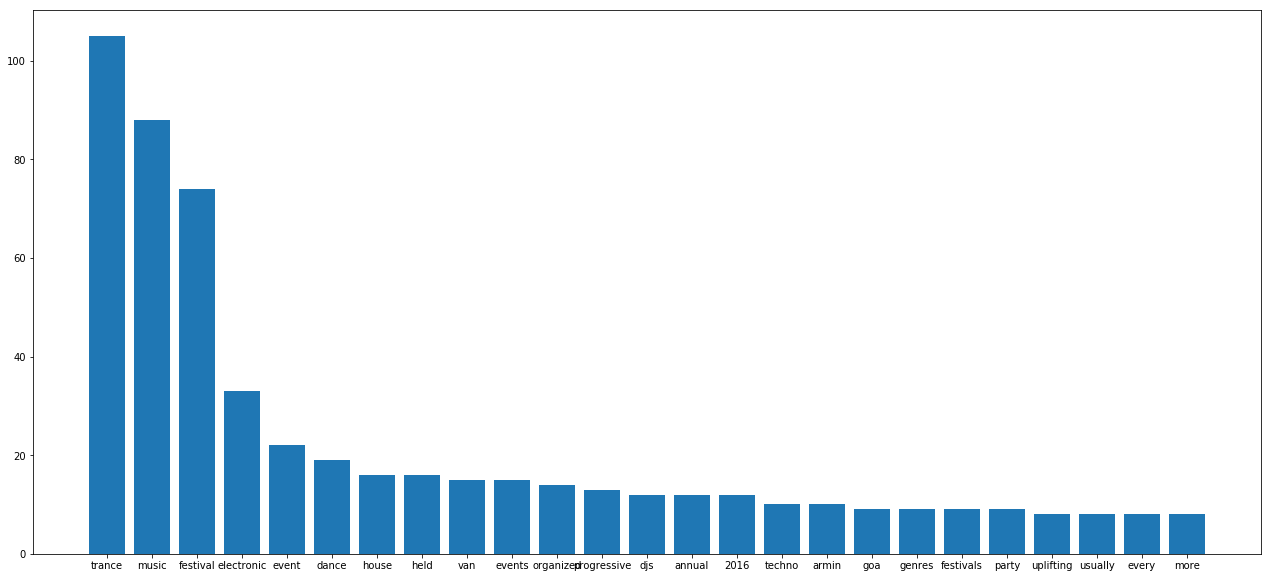

<Figure size 1760x800 with 0 Axes>

In [65]:
a.plotwords(25)

In [11]:
a.commonwordspct(50)

50% threshold means the most common words shown below appeared equal to or less than 1307 times out of 2614 total word count.

For the word count threshold, the 234 most common words are shown.


{'trance': 105, 'music': 88, 'festival': 74, 'electronic': 33, 'event': 22, 'dance': 19, 'house': 16, 'held': 16, 'van': 15, 'events': 15, 'organized': 14, 'progressive': 13, 'djs': 12, 'annual': 12, '2016': 12, 'techno': 10, 'armin': 10, 'goa': 9, 'genres': 9, 'festivals': 9, 'party': 9, 'uplifting': 8, 'usually': 8, 'every': 8, 'more': 8, 'psychedelic': 8, 'c': 8, 'often': 7, '1': 7, '2': 7, 'styles': 7, 'drum': 7, 'sound': 7, 'outdoor': 7, 'hosted': 7, 'd': 7, 'e': 7, 'wikipedia': 7, '1990s': 6, 'state': 6, 'elements': 6, 'vocal': 6, 'been': 6, 'international': 6, 'acid': 6, 'buuren': 6, '2009': 6, '2012': 6, 'isbn': 6, 'original': 6, 'genre': 5, 'tech': 5, 'tracks': 5, 'featured': 5, 'love': 5, 'paul': 5, 'hard': 5, 'artists': 5, 'dj': 5, 'list': 5, 'mainly': 5, 'id&amp;t': 5, 'three-day':

In [12]:
a.totalwords()

Total word count is 4292
Total word count is 2614 after implementing banlist

Unique word count is 1470 for the Wikipedia site titled Trance Music
Unique word count AFTER BANLIST is 1373 for the Wikipedia site titled Trance Music


In [13]:
a.summary('a')

The number of paragraphs specified is not an integer. Default 2 paragraphs will be displayed 



Trance is a genre of electronic music that emerged from the British new-age music scene and the early 1990s German techno and hardcore scenes. At the same time trance music was developing in Europe, the genre was also gathering a following in the Indian state of Goa.
 

Trance music is characterized by a tempo lying between 110–150 bpm (BPM), repeating melodic phrases and a musical form that distinctly builds tension and elements throughout a track often culminating in 1 to 2 "peaks" or "drops". Although trance is a genre of its own, it liberally incorporates influences from other musical styles such as techno, house pop chill-out classical music tech house ambient and film music.



In [14]:
a.summary(5)



Trance is a genre of electronic music that emerged from the British new-age music scene and the early 1990s German techno and hardcore scenes. At the same time trance music was developing in Europe, the genre was also gathering a following in the Indian state of Goa.
 

Trance music is characterized by a tempo lying between 110–150 bpm (BPM), repeating melodic phrases and a musical form that distinctly builds tension and elements throughout a track often culminating in 1 to 2 "peaks" or "drops". Although trance is a genre of its own, it liberally incorporates influences from other musical styles such as techno, house pop chill-out classical music tech house ambient and film music.
 

A trance is a state of hypnotism and heightened consciousness. This is portrayed in trance music by the mixing of layers with distinctly foreshadowed build-up and release. A common characteristic of trance music is a mid-song climax followed by a soft breakdown disposing of beats and percussion entirely,

In [15]:
wtf = wiki('dijvbedi')

Wikipedia page could not be found for "Dijvbedi". Please try again!
Other useful information: Enclose title argument with single quotes. Spaces are allowed, and title is case insensitive.


In [16]:
hp = wiki('hp')
python = wiki('python')


The title "Hp" you specified is ambiguous. As a result, you are linked to a clarification page.


Here are some suggestions to use: 

Hp
HP
hp
HP Inc.
Horsepower
Harry Pearson (audio critic)
Harry Potter
Hello! Project
Hit points
Horse-Power: Ballet Symphony
H. P. Lovecraft
HP Inc.
Hewlett-Packard
Hewlett Packard Enterprise
HPBooks
HP Foods
HP Sauce
Handley Page
Hensel Phelps
Hindustan Petroleum
America West Airlines
Heart Peaks
Himachal Pradesh
Hunters Point (San Francisco)
HP postcode area
Haptoglobin
Health professional
Helicobacter pylori
Higher Power
Hypersensitivity pneumonitis
Hyperprolactinaemia
Horsepower
High pressure
Ilford HP
High precipitation supercell
Hollow point
Horizontal pitch
Half-pay
Haltepunkt
Hire purchase
Howiesons Poort
Hybrid perpetual
HP Garage
Harry Potter (disambiguation)
Health (gaming)

The title "Python" you specified is ambiguous. As a result, you are linked to a clarification page.


Here are some suggestions to use: 

Python
python
Pythonidae
Python 

In [17]:
b = wiki('Lee Kuan Yew')

Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


In [18]:
b.summary(5)



Lee Kuan Yew GCMG CH SPMJ (16 September 1923 – 23 March 2015), commonly referred to by his initials LKY was the first Prime Minister of Singapore, governing for three decades. Lee is recognised as the nation's founding father, with the country described as transitioning from the "third world to first world in a single generation" under his leadership.
 

After attending the London School of Economics, Lee graduated from Fitzwilliam College, Cambridge with double starred-first-class honours in law. In 1950, he became a barrister of the Middle Temple and practised law until 1959. Lee co-founded the People's Action Party (PAP) in 1954 and was its first secretary-general until 1992, leading the party to eight consecutive victories. After Lee chose to step down as Prime Minister in 1990, he served as Senior Minister under his successor, Goh Chok Tong until 2004, then as Minister Mentor (an advisory post) until 2011, under his son Lee Hsien Loong. In total, Lee held successive ministerial 

In [19]:
b.gettext()



 
Lee Kuan Yew GCMG CH SPMJ (16 September 1923 – 23 March 2015), commonly referred to by his initials LKY was the first Prime Minister of Singapore, governing for three decades. Lee is recognised as the nation's founding father, with the country described as transitioning from the "third world to first world in a single generation" under his leadership.
 
After attending the London School of Economics, Lee graduated from Fitzwilliam College, Cambridge with double starred-first-class honours in law. In 1950, he became a barrister of the Middle Temple and practised law until 1959. Lee co-founded the People's Action Party (PAP) in 1954 and was its first secretary-general until 1992, leading the party to eight consecutive victories. After Lee chose to step down as Prime Minister in 1990, he served as Senior Minister under his successor, Goh Chok Tong until 2004, then as Minister Mentor (an advisory post) until 2011, under his son Lee Hsien Loong. In total, Lee held successive ministerial

In [20]:
b.commonwords(150)

{'lee': 515, 'singapore': 280, 'kuan': 212, 'yew': 187, '2015': 122, 'times': 89, '2014': 76, 'singapores': 58, 'isbn': 50, 'minister': 49, 'straits': 47, '15': 45, 'lees': 44, 'world': 43, '2010': 41, '2013': 41, 'singapore:': 40, 'i': 39, 'had': 36, 'prime': 33, '2011': 32, 'were': 32, 'artist': 32, 'mr': 32, 'press': 31, 'national': 30, 'original': 30, '2016': 29, 'government': 28, 'chinese': 27, '21': 26, '2009': 26, 'art': 26, 'singaporean': 25, 'book': 25, 'international': 24, '–': 23, 'former': 22, '23': 21, 'years': 21, '22': 21, 'third': 20, 'british': 20, 'yew:': 20, '2000': 20, 'tan': 20, 'law': 19, 'malaysia': 19, 'political': 19, 'news': 19, 'wikipedia': 19, 'under': 18, 'london': 18, 'party': 18, 'japanese': 18, 'made': 18, 'order': 18, 'york': 18, 'exhibition': 18, '2012': 18, '4': 18, 'yews': 17, '2': 17, 'same': 17, '13': 17, '25': 17, '29': 17, 'university': 16, 'state': 16, 'water': 16, 'published': 16, 'gallery': 16, 'channel': 16, 'newsasia': 16, '16': 15, 'pap': 1

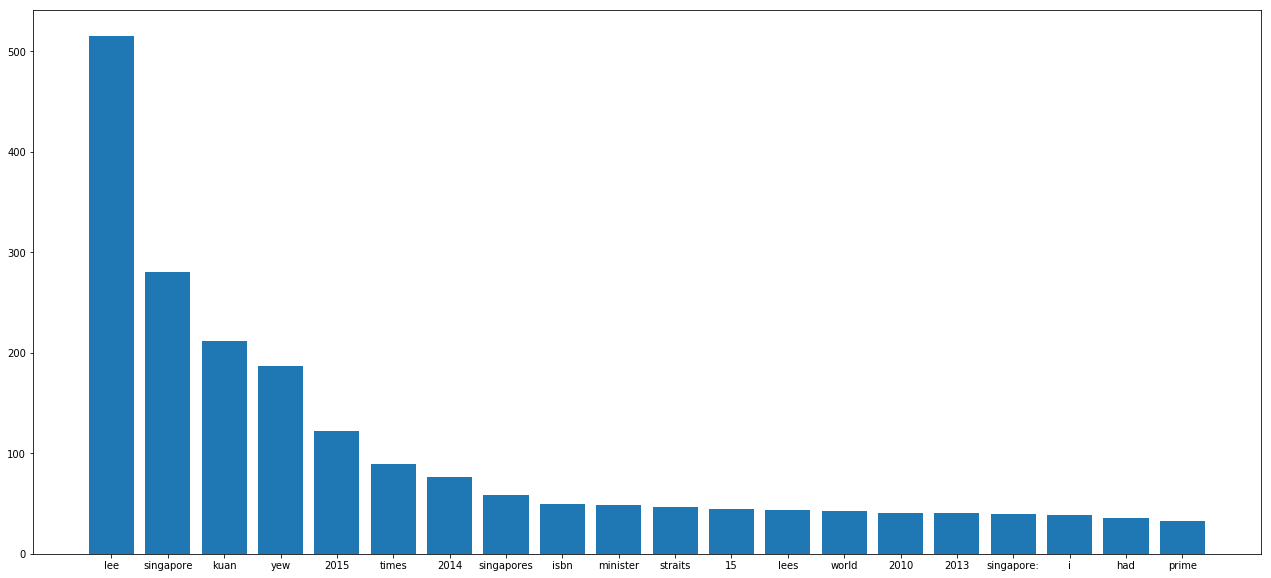

<Figure size 1760x800 with 0 Axes>

In [21]:
b.plotwords(20)

In [22]:
b.HELP()

The wiki() class accepts 3 arguments. The first one is a compulsory title of the Wikipedia page with spaces allowed. The other two are optional numbers

commonwords accepts 1 optional argument (default: 100) for the number of most common words in the site to show

commonwordspct accepts 1 optional argument (default: 10) on the percentage threshold of word count to determine the most common words

plotwords accepts 1 optional argument (default: 20) for the number of most common words to show as a GRAPH

totalwords accepts 0 arguments and shows the total word count and unique word count

summary accepts 1 optional argument for the number of paragraphs (default: 2) and gives a summary of the Wikipedia page

gettext accepts 0 arguments and retrieves the full text of the Wikipedia title



In [23]:
b.commonwordspct(10.11)

10.11% threshold means the most common words shown below appeared equal to or less than 1188 times out of 11753 total word count.

For the word count threshold, the 3 most common words are shown.


{'lee': 515, 'singapore': 280, 'kuan': 212}


In [24]:
b.totalwords()

Total word count is 18678
Total word count is 11753 after implementing banlist

Unique word count is 4373 for the Wikipedia site titled Lee Kuan Yew
Unique word count AFTER BANLIST is 4247 for the Wikipedia site titled Lee Kuan Yew


In [25]:
c = wiki('Dota 2')

Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


In [26]:
c.summary()



Dota 2 is a multiplayer online battle arena (MOBA) video game developed and published by Valve Corporation. The game is a sequel to Defense of the Ancients (DotA), which was a community-created mod for Blizzard Entertainment's Warcraft III: Reign of Chaos and its expansion pack, The Frozen Throne. Dota 2 is played in matches between two teams of five players, with each team occupying and defending their own separate base on the map. Each of the ten players independently controls a powerful character, known as a "hero", who all have unique abilities and differing styles of play. During a match, players collect experience points and items for their heroes to successfully defeat the opposing team's heroes in player versus player combat. A team wins by being the first to destroy a large structure located in the opposing team's base, called the "Ancient".
 

Development of Dota 2 began in 2009 when IceFrog lead designer of the original Defense of the Ancients mod, was hired by Valve to cr

In [27]:
c.HELP()

The wiki() class accepts 3 arguments. The first one is a compulsory title of the Wikipedia page with spaces allowed. The other two are optional numbers

commonwords accepts 1 optional argument (default: 100) for the number of most common words in the site to show

commonwordspct accepts 1 optional argument (default: 10) on the percentage threshold of word count to determine the most common words

plotwords accepts 1 optional argument (default: 20) for the number of most common words to show as a GRAPH

totalwords accepts 0 arguments and shows the total word count and unique word count

summary accepts 1 optional argument for the number of paragraphs (default: 2) and gives a summary of the Wikipedia page

gettext accepts 0 arguments and retrieves the full text of the Wikipedia title



In [28]:
c.gettext()



 
Dota 2 is a multiplayer online battle arena (MOBA) video game developed and published by Valve Corporation. The game is a sequel to Defense of the Ancients (DotA), which was a community-created mod for Blizzard Entertainment's Warcraft III: Reign of Chaos and its expansion pack, The Frozen Throne. Dota 2 is played in matches between two teams of five players, with each team occupying and defending their own separate base on the map. Each of the ten players independently controls a powerful character, known as a "hero", who all have unique abilities and differing styles of play. During a match, players collect experience points and items for their heroes to successfully defeat the opposing team's heroes in player versus player combat. A team wins by being the first to destroy a large structure located in the opposing team's base, called the "Ancient".
 
Development of Dota 2 began in 2009 when IceFrog lead designer of the original Defense of the Ancients mod, was hired by Valve to c

In [29]:
c.commonwords(150)

{'dota': 331, '2': 296, 'original': 255, '2016': 209, 'game': 161, '2017': 128, '2013': 108, 'games': 99, 'valve': 95, '2018': 65, 'players': 64, 'pc': 60, '2012': 53, '2015': 51, 'gamer': 49, '2014': 46, 'heroes': 44, 'video': 40, 'international': 39, 'hero': 34, '12': 32, '1': 31, '13': 31, 'major': 30, 'ign': 30, 'best': 30, '10': 29, '2011': 29, 'team': 28, '9': 28, 'steam': 25, '25': 25, 'polygon': 25, '3': 25, '7': 25, '29': 25, 'known': 24, '15': 24, 'defense': 23, 'million': 23, '20': 23, '8': 23, 'ancients': 22, 'being': 22, '21': 22, 'mode': 21, 'announced': 21, '16': 21, 'system': 20, '24': 20, 'source': 19, 'esports': 19, '30': 19, 'chris': 19, 'awards': 19, 'each': 18, 'released': 18, 'had': 18, 'valves': 18, 'update': 18, '4': 18, 'teams': 17, 'more': 17, 'were': 17, '27': 17, 'battle': 16, 'player': 16, 'custom': 16, 'world': 16, '22': 16, 'gamespot': 15, '19': 15, '2s': 15, '28': 15, '14': 15, 'play': 14, 'community': 14, 'events': 14, '18': 14, 'espn': 14, 'map': 13, '

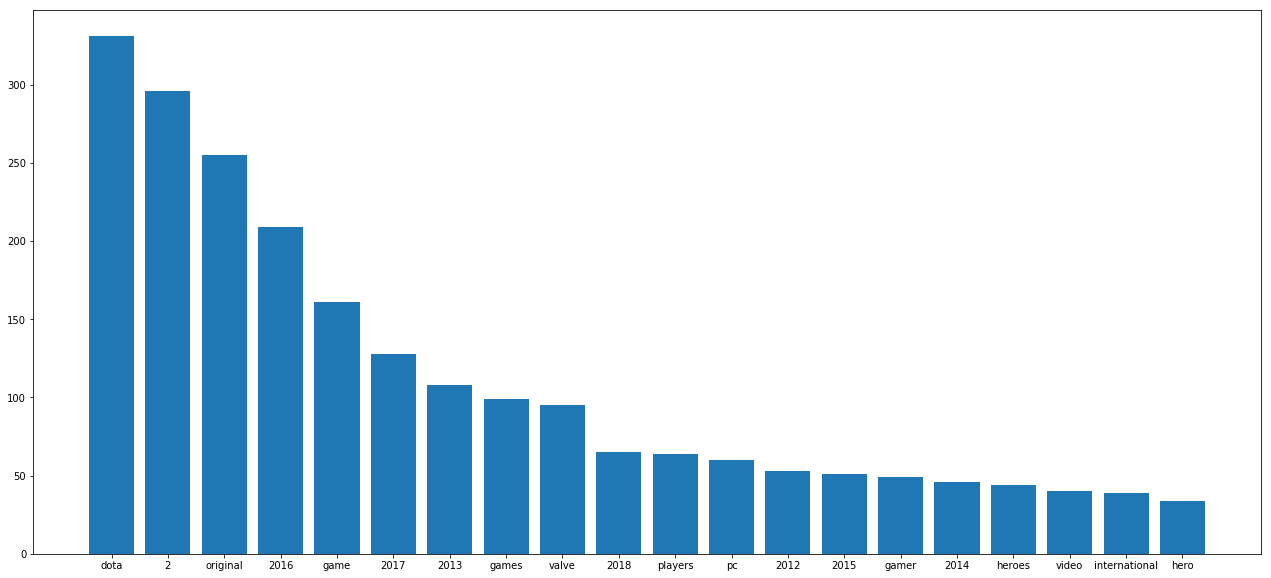

<Figure size 1760x800 with 0 Axes>

In [30]:
c.plotwords()

In [31]:
c.commonwordspct(30)

30% threshold means the most common words shown below appeared equal to or less than 2749 times out of 9164 total word count.

For the word count threshold, the 39 most common words are shown.


{'dota': 331, '2': 296, 'original': 255, '2016': 209, 'game': 161, '2017': 128, '2013': 108, 'games': 99, 'valve': 95, '2018': 65, 'players': 64, 'pc': 60, '2012': 53, '2015': 51, 'gamer': 49, '2014': 46, 'heroes': 44, 'video': 40, 'international': 39, 'hero': 34, '12': 32, '1': 31, '13': 31, 'major': 30, 'ign': 30, 'best': 30, '10': 29, '2011': 29, 'team': 28, '9': 28, 'steam': 25, '25': 25, 'polygon': 25, '3': 25, '7': 25, '29': 25, 'known': 24, '15': 24, 'defense': 23}


In [32]:
c.totalwords()

Total word count is 15390
Total word count is 9164 after implementing banlist

Unique word count is 2845 for the Wikipedia site titled Dota 2
Unique word count AFTER BANLIST is 2731 for the Wikipedia site titled Dota 2


In [33]:
vangogh = wiki('Van Gogh')

Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


In [34]:
vangogh.summary()



Vincent Willem van Gogh (Dutch:  (listen); 30 March 1853 – 29 July 1890) was a Dutch Post-Impressionist painter who is among the most famous and influential figures in the history of Western art. In just over a decade he created about 2,100 artworks, including around 860 oil paintings most of them in the last two years of his life. They include landscapes still lifes portraits and self-portraits and are characterised by bold colours and dramatic, impulsive and expressive brushwork that contributed to the foundations of modern art. However, he was not commercially successful and his suicide at 37 followed years of mental illness and poverty.
 

Born into an upper-middle-class family, Van Gogh drew as a child and was serious, quiet and thoughtful. As a young man he worked as an art dealer, often travelling, but became depressed after he was transferred to London. He turned to religion and spent time as a Protestant missionary in southern Belgium. He drifted in ill health and solitude b

In [35]:
vangogh.HELP()

The wiki() class accepts 3 arguments. The first one is a compulsory title of the Wikipedia page with spaces allowed. The other two are optional numbers

commonwords accepts 1 optional argument (default: 100) for the number of most common words in the site to show

commonwordspct accepts 1 optional argument (default: 10) on the percentage threshold of word count to determine the most common words

plotwords accepts 1 optional argument (default: 20) for the number of most common words to show as a GRAPH

totalwords accepts 0 arguments and shows the total word count and unique word count

summary accepts 1 optional argument for the number of paragraphs (default: 2) and gives a summary of the Wikipedia page

gettext accepts 0 arguments and retrieves the full text of the Wikipedia title



In [36]:
vangogh.gettext()



 

 
Vincent Willem van Gogh (Dutch:  (listen); 30 March 1853 – 29 July 1890) was a Dutch Post-Impressionist painter who is among the most famous and influential figures in the history of Western art. In just over a decade he created about 2,100 artworks, including around 860 oil paintings most of them in the last two years of his life. They include landscapes still lifes portraits and self-portraits and are characterised by bold colours and dramatic, impulsive and expressive brushwork that contributed to the foundations of modern art. However, he was not commercially successful and his suicide at 37 followed years of mental illness and poverty.
 
Born into an upper-middle-class family, Van Gogh drew as a child and was serious, quiet and thoughtful. As a young man he worked as an art dealer, often travelling, but became depressed after he was transferred to London. He turned to religion and spent time as a Protestant missionary in southern Belgium. He drifted in ill health and solitu

In [37]:
vangogh.commonwords(200)

{'van': 459, 'gogh': 321, 'vincent': 115, 'museum': 82, 'theo': 75, 'art': 67, 'goghs': 64, '1990': 61, '1888': 59, 'arles': 57, 'paintings': 55, 'had': 53, 'isbn': 49, '1890': 47, '1889': 47, 'letter': 40, 'paris': 40, 'painted': 39, 'amsterdam': 37, 'gauguin': 36, 'were': 36, 'painting': 35, '2009': 35, 'life': 34, '2011': 33, 'de': 32, 'naifeh': 32, 'smith': 32, '–': 31, 'works': 30, 'wheat': 30, 'pickvance': 30, '1981': 30, 'still': 28, 'hulsker': 27, 'wikipedia': 27, 'portrait': 26, 'dutch': 25, 'paul': 25, 'during': 25, 'wrote': 25, 'night': 25, 'tralbaut': 25, 'been': 24, 'cypresses': 24, '1986': 24, 'where': 23, 'later': 22, 'letters': 22, 'yellow': 22, 'left': 21, 'house': 21, 'la': 21, 'field': 21, 'became': 20, 'early': 20, 'gallery': 20, 'walther': 20, 'metzger': 20, '1994': 20, 'identifiers': 20, 'hague': 19, 'i': 19, 'moved': 18, '2016': 18, 'self-portrait': 18, 'including': 17, 'himself': 17, '1887': 17, 'c': 17, 'series': 16, 'trees': 16, 'ear': 16, 'collection': 16, 'm

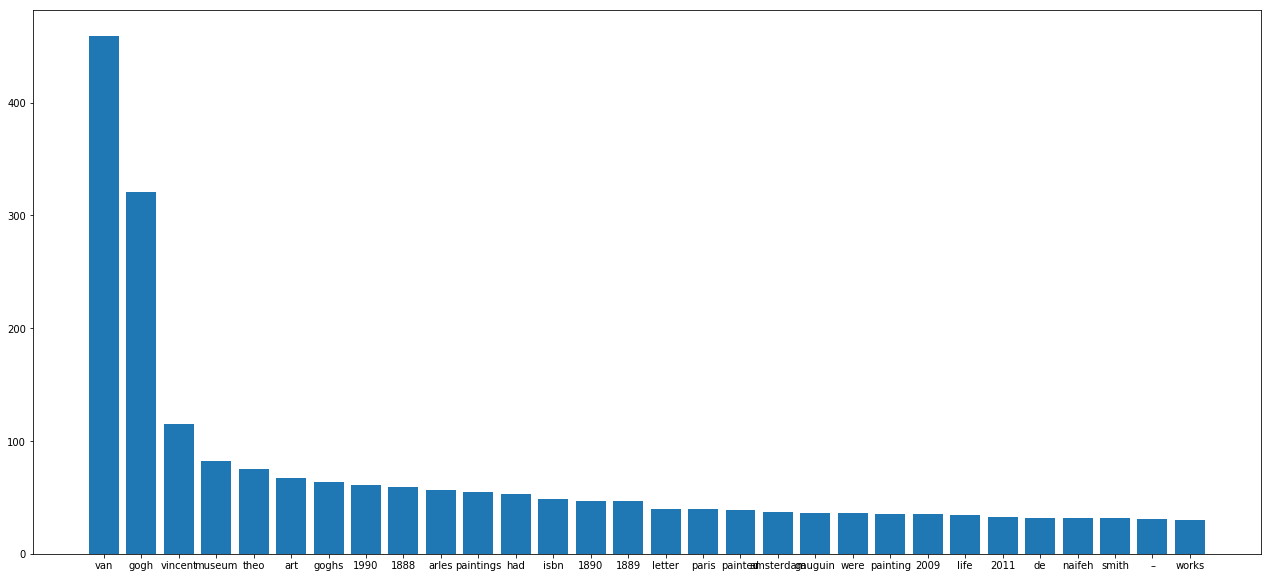

<Figure size 1760x800 with 0 Axes>

In [38]:
vangogh.plotwords(30)

In [39]:
amsterdam = wiki('amsterdam')

Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


In [40]:
amsterdam.summary()



Amsterdam (/ˈæmstərdæm/ UK also /ˌæmstərˈdæm/; Dutch:  (listen)) is the capital city and most populous municipality of the Netherlands. Its status as the capital is mandated by the Constitution of the Netherlands although it is not the seat of the government, which is The Hague. Amsterdam has a population of 851,373 within the city proper 1,351,587 in the urban area and 2,410,960 in the metropolitan area. The city is located in the province of North Holland in the west of the country but is not its capital, which is Haarlem. The metropolitan area comprises much of the northern part of the Randstad one of the larger conurbations in Europe with a population of approximately 8 million.
 

Amsterdam's name derives from Amstelredamme indicative of the city's origin around a dam in the river Amstel. Originating as a small fishing village in the late 12th century, Amsterdam became one of the most important ports in the world during the Dutch Golden Age (17th century), as a result of its inn

In [41]:
amsterdam.commonwords(200)

{'amsterdam': 389, 'city': 133, 'dutch': 133, '2008': 101, 'original': 81, 'van': 62, 'were': 51, 'de': 49, 'netherlands': 45, 'century': 44, 'museum': 42, 'many': 40, 'centre': 38, 'amsterdams': 37, 'world': 37, '2014': 33, '–': 31, 'area': 29, 'large': 29, '-': 29, 'population': 28, 'largest': 25, '2010': 25, 'square': 25, 'buildings': 24, '2007': 24, 'north': 23, 'been': 23, 'located': 22, '5': 22, 'international': 22, '10': 21, '2013': 21, 'pdf': 21, 'het': 20, 'citys': 19, 'during': 19, 'cities': 19, 'holland': 18, 'part': 18, 'built': 18, 'canal': 18, '22': 18, 'municipality': 17, 'became': 17, 'canals': 17, 'second': 17, '2009': 17, 'war': 17, 'municipal': 17, '19': 17, 'capital': 16, 'europe': 16, 'million': 16, 'port': 16, 'en': 16, 'wikipedia': 16, '19th': 15, 'gogh': 15, 'known': 15, 'several': 15, 'had': 15, 'station': 15, 'public': 15, 'three': 15, 'amsterdamse': 15, 'building': 15, 'e': 15, 'west': 14, 'more': 14, 'national': 14, 'theatre': 14, 't': 14, '21': 14, 'isbn': 

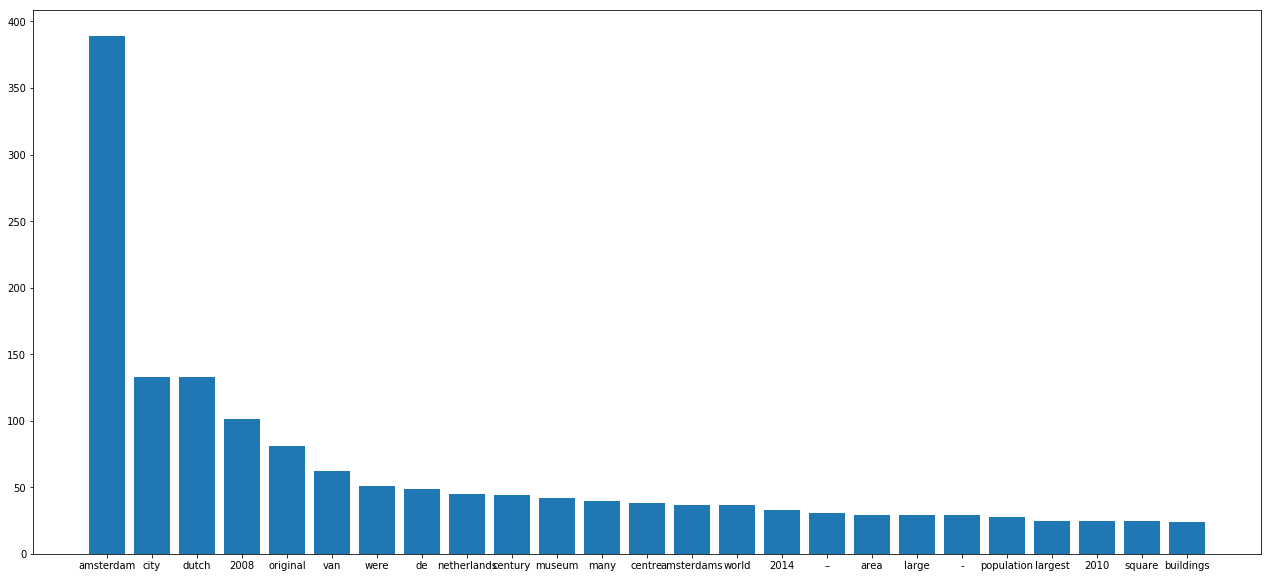

<Figure size 1760x800 with 0 Axes>

In [42]:
amsterdam.plotwords(25)

In [43]:
wwii = wiki('World War 2')

Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


In [44]:
wwii.summary()



World War II (often abbreviated to WWII or WW2), also known as the Second World War was a global war that lasted from 1939 to 1945. The vast majority of the world's countries—including all the great powers—eventually formed two opposing military alliances: the Allies and the Axis. A state of total war emerged, directly involving more than 100 million people from over 30 countries. The major participants threw their entire economic, industrial, and scientific capabilities behind the war effort blurring the distinction between civilian and military resources. World War II was the deadliest conflict in human history, marked by 50 to 85 million fatalities, most of whom were civilians in the Soviet Union and China. It included massacres the genocide of the Holocaust strategic bombing premeditated death from starvation and disease, and the only use of nuclear weapons in war.
 

Japan which aimed to dominate Asia and the Pacific was at war with China by 1937, though neither side had declare

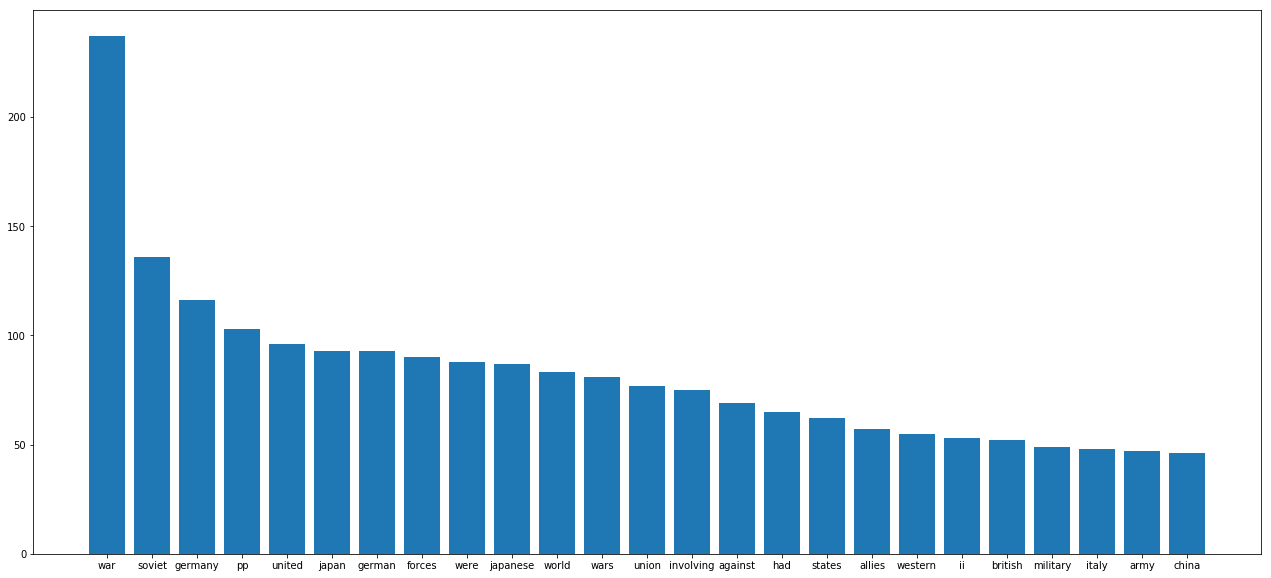

<Figure size 1760x800 with 0 Axes>

In [45]:
wwii.plotwords(25)

In [46]:
pokemon = wiki('Pokemon')

Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


In [47]:
pokemon.summary()



Pokémon (Japanese: ポケモン Hepburn: Pokemon English: /ˈpoʊkɪˌmɒn -ki-, -keɪ-/) also known as Pocket Monsters (ポケットモンスター) in Japan, is a media franchise managed by The Pokémon Company a Japanese consortium between Nintendo Game Freak and Creatures. The franchise copyright is shared by all three companies, but Nintendo is the sole owner of the trademark. The franchise was created by Satoshi Tajiri in 1995, and is centered on fictional creatures called "Pokémon" which humans, known as Pokémon Trainers, catch and train to battle each other for sport. The English slogan for the franchise is "Gotta Catch 'Em All". Works within the franchise are set in the Pokémon universe.
 

The franchise began as Pokémon Red and Green (released outside of Japan as Pokémon Red and Blue), a pair of video games for the original Game Boy that were developed by Game Freak and published by Nintendo in February 1996. Pokémon has since gone on to become the highest-grossing media franchise of all time, with over $7

In [48]:
pokemon.HELP()

The wiki() class accepts 3 arguments. The first one is a compulsory title of the Wikipedia page with spaces allowed. The other two are optional numbers

commonwords accepts 1 optional argument (default: 100) for the number of most common words in the site to show

commonwordspct accepts 1 optional argument (default: 10) on the percentage threshold of word count to determine the most common words

plotwords accepts 1 optional argument (default: 20) for the number of most common words to show as a GRAPH

totalwords accepts 0 arguments and shows the total word count and unique word count

summary accepts 1 optional argument for the number of paragraphs (default: 2) and gives a summary of the Wikipedia page

gettext accepts 0 arguments and retrieves the full text of the Wikipedia title



In [49]:
pokemon.commonwords(200)

{'pokémon': 264, 'game': 61, '2016': 52, 'pokemon': 47, 'series': 40, 'games': 36, 'original': 34, '2018': 34, 'pikachu': 32, 'media': 29, 'world': 29, 'nintendo': 27, 'card': 26, 'league': 26, 'franchise': 24, 'released': 22, '2013': 22, 'trading': 21, 'video': 20, 'pokémon:': 20, '2014': 20, 'isbn': 19, '10': 18, 'were': 17, 'anime': 17, 'players': 17, 'pocket': 16, 'japan': 16, 'battle': 16, 'trainer': 16, 'billion': 15, 'cards': 15, 'viz': 15, 'monsters': 14, 'company': 14, 'satoshi': 14, '2015': 14, 'trainers': 13, '2017': 13, 'black': 13, '–': 13, 'each': 12, 'manga': 12, 'release': 12, '1999': 12, '2012': 12, '4': 12, 'white': 12, '2019': 11, 'been': 11, '27': 11, '2007': 11, 'center': 11, 'bulbapedia': 11, '2': 11, '2008': 11, '2011': 11, 'red': 10, 'boy': 10, 'lets': 10, 'based': 10, 'while': 10, '18': 10, 'official': 10, 'adventures': 10, 'store': 10, '14': 10, '2009': 10, '2010': 10, 'championship': 10, 'japanese': 9, '20': 9, 'super': 9, 'detective': 9, 'sun': 9, 'master': 

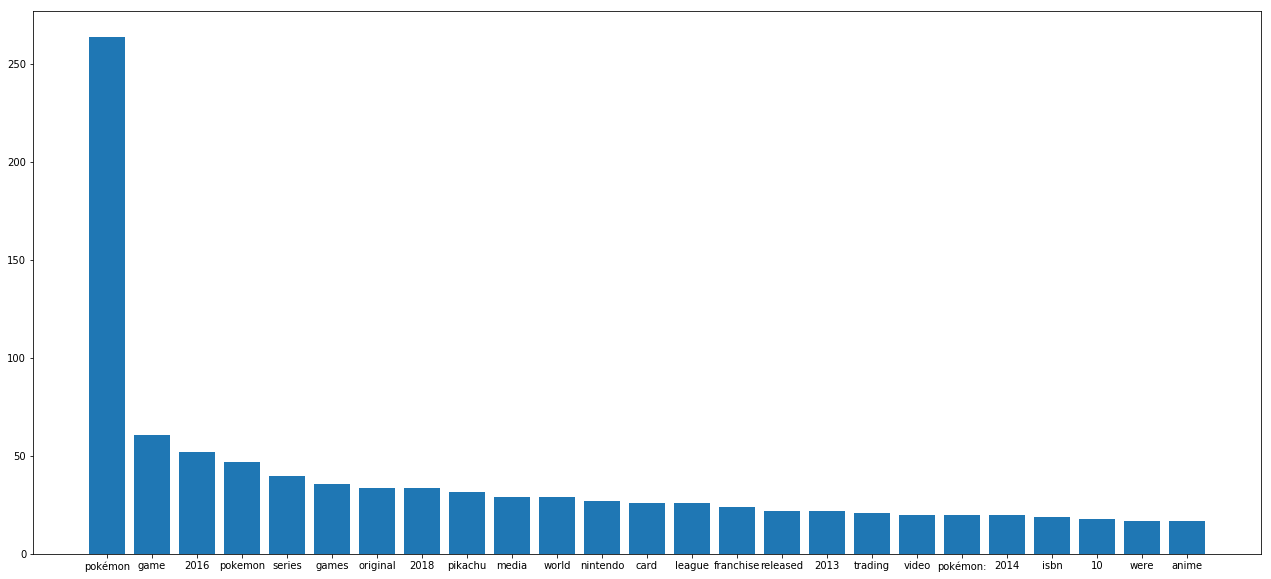

<Figure size 1760x800 with 0 Axes>

In [50]:
pokemon.plotwords(25)

In [51]:
DJT = wiki('Donald Trump')
DJT.summary(5)

Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


Donald John Trump (born June 14, 1946) is the 45th and current president of the United States. Before entering politics, he was a businessman and television personality.
 

Trump was born and raised in the New York City borough of Queens and received an economics degree from the Wharton School. He was appointed president of his family's real estate business in 1971, renamed it The Trump Organization and expanded it from Queens and Brooklyn into Manhattan. The company built or renovated skyscrapers, hotels, casinos, and golf courses. Trump later started various side ventures, including licensing his name for real estate and consumer products. He managed the company until his 2017 inauguration. He co-authored several books including The Art of the Deal. He owned the Miss Universe and Miss USA beauty pageants from 1996 to 2015, and he produced and hosted The Apprentice a reality television show

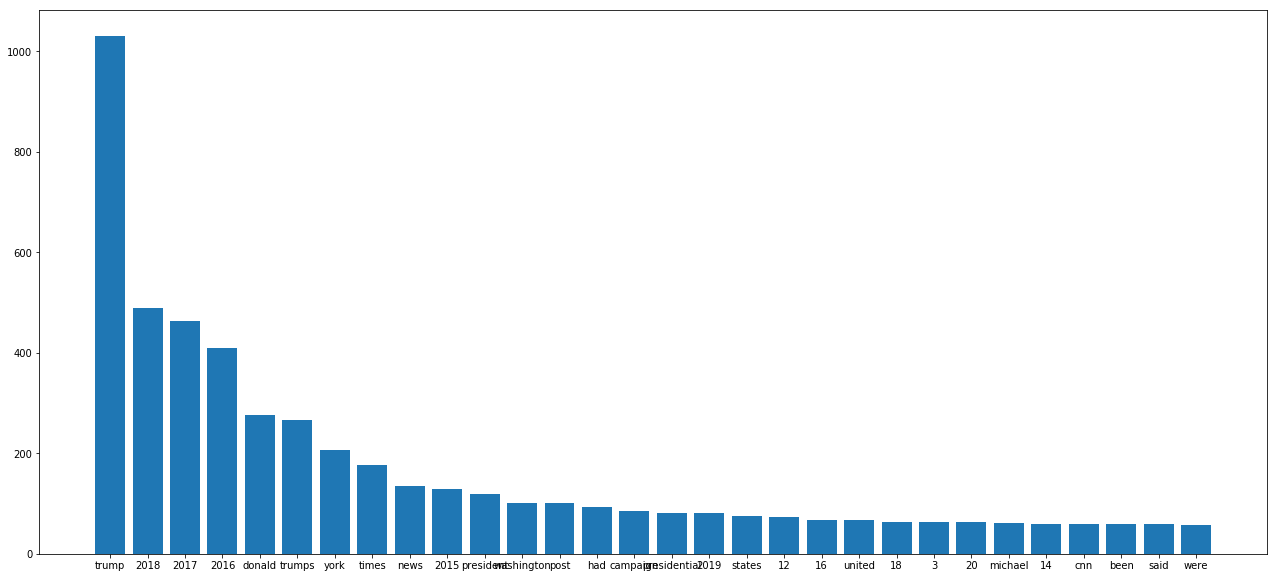

<Figure size 1760x800 with 0 Axes>

In [52]:
DJT.plotwords(30)

In [53]:
DJT.commonwords(150)

{'trump': 1030, '2018': 490, '2017': 464, '2016': 410, 'donald': 276, 'trumps': 266, 'york': 206, 'times': 176, 'news': 135, '2015': 129, 'president': 119, 'washington': 102, 'post': 101, 'had': 93, 'campaign': 86, 'presidential': 81, '2019': 81, 'states': 75, '12': 73, '16': 68, 'united': 67, '18': 64, '3': 63, '20': 63, 'michael': 61, '14': 60, 'cnn': 60, 'been': 59, 'said': 59, 'were': 58, '15': 58, '7': 57, '6': 57, 'tax': 56, '21': 56, 'election': 55, 'during': 54, 'against': 54, 'white': 53, 'house': 53, '9': 51, '11': 49, '22': 48, '17': 46, 'business': 45, 'i': 45, 'republican': 44, '13': 44, '10': 44, '19': 44, 'david': 44, '2': 44, 'million': 43, '8': 43, '25': 43, 'american': 42, '2011': 42, '–': 41, 'press': 41, 'investigation': 40, '23': 40, '29': 40, '5': 40, 'office': 39, '4': 39, '28': 39, 'political': 38, 'federal': 38, 'says': 38, '27': 38, 'court': 37, 'nbc': 37, '1': 37, 'national': 36, '26': 36, 'world': 35, 'media': 34, '24': 34, 'made': 33, 'general': 33, 'trump:

In [54]:
queen = wiki('Elizabeth II')
queen.summary(5)

Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


Elizabeth II (Elizabeth Alexandra Mary; born 21 April 1926) is Queen of the United Kingdom and the other Commonwealth realms.
 

Elizabeth was born in London as the first child of the Duke and Duchess of York, later King George VI and Queen Elizabeth and she was educated privately at home. Her father acceded to the throne on the abdication of his brother King Edward VIII in 1936, from which time she was the heir presumptive. She began to undertake public duties during the Second World War serving in the Auxiliary Territorial Service. In 1947, she married Prince Philip, Duke of Edinburgh a former prince of Greece and Denmark, with whom she has four children: Charles, Prince of Wales; Anne, Princess Royal; Prince Andrew, Duke of York; and Prince Edward, Earl of Wessex.
 

When her father died in February 1952, she became head of the Commonwealth and queen regnant of seven independent Commonwea

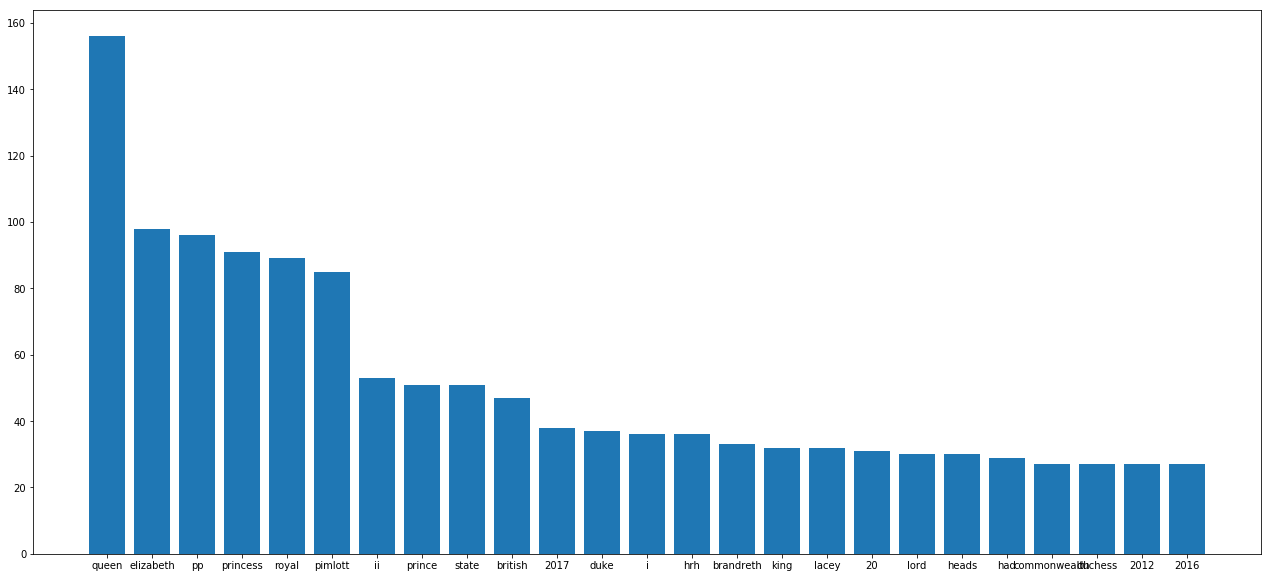

<Figure size 1760x800 with 0 Axes>

In [55]:
queen.plotwords(25)

In [56]:
queen.commonwords(150)

{'queen': 156, 'elizabeth': 98, 'pp': 96, 'princess': 91, 'royal': 89, 'pimlott': 85, 'ii': 53, 'prince': 51, 'state': 51, 'british': 47, '2017': 38, 'duke': 37, 'i': 36, 'hrh': 36, 'brandreth': 33, 'king': 32, 'lacey': 32, '20': 31, 'lord': 30, 'heads': 30, 'had': 29, 'commonwealth': 27, 'duchess': 27, '2012': 27, '2016': 27, 'bond': 26, 'shawcross': 26, 'queens': 25, 'news': 25, 'isbn': 25, 'edward': 24, 'public': 24, 'were': 24, 'family': 23, 'bbc': 23, 'george': 22, 'philip': 22, 'monarch': 22, 'household': 22, 'united': 21, 'london': 21, 'york': 21, 'later': 21, 'canada': 21, 'elizabeths': 21, 'years': 21, '18': 21, '2010': 21, 'london:': 21, 'head': 20, '2015': 20, 'wikipedia': 20, 'roberts': 19, '21': 18, 'during': 18, 'jubilee': 18, 'charles': 17, 'australia': 17, 'tour': 17, 'wedding': 17, 'cambridge': 17, 'visit': 16, 'wales': 16, 'v': 16, '2007': 16, 'iii': 16, '2013': 16, 'bradford': 16, 'marr': 16, 'original': 16, 'been': 15, 'personal': 15, 'mary': 15, 'britain': 15, 'pri

In [57]:
heil = wiki('Adolf Hilter')
heil.summary(3)

Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


Adolf Hitler (German:  (listen); 20 April 1889 – 30 April 1945) was a German politician and leader of the Nazi Party (Nationalsozialistische Deutsche Arbeiterpartei; NSDAP). He rose to power to become dictator of Germany, serving as Chancellor from 1933 and Führer ("Leader") from 1934. During his dictatorship from 1933 to 1945, he initiated World War II in Europe  by invading Poland in September 1939. He closely supervised military operations during the war and by December 1941 had full control of all strategic decisions, especially on the Eastern Front. He was central to the perpetration of the Holocaust. 
 

Hitler was born in Austria—then part of Austria-Hungary—and was raised near Linz. He moved to Germany in 1913 and was decorated during his service in the German Army in World War I. In 1919, he joined the German Workers' Party (DAP), the precursor of the NSDAP, and was appointed leader

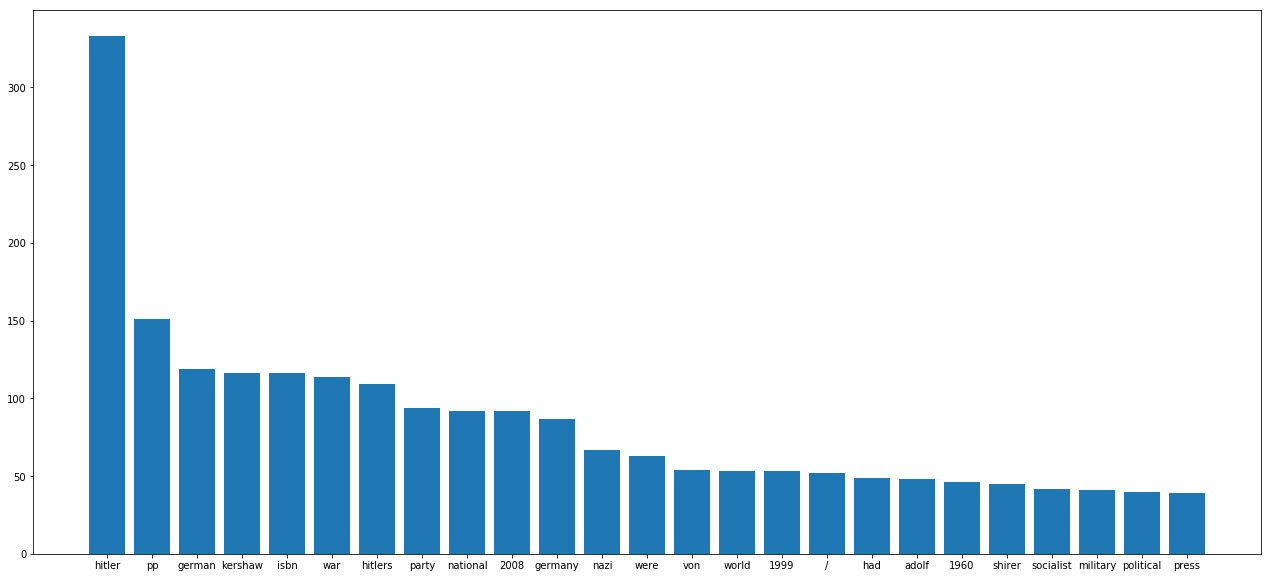

<Figure size 1760x800 with 0 Axes>

In [58]:
heil.plotwords(25)

In [59]:
blah = wiki('Millenials')
blah.summary(3)

Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


Millennials also known as Generation Y or Gen Y are the generational demographic cohort following Generation X and preceding Generation Z. There are no precise dates for when this cohort starts or ends; demographers and researchers typically use the early 1980s as starting birth years and the mid-1990s to early 2000s as ending birth years.  Millennials are sometimes referred to as "echo boomers" due to a major surge in birth rates in the 1980s and 1990s, and because millennials are often the children of the baby boomers. Although millennial characteristics vary by region, depending on social and economic conditions, the generation has been generally marked by an increased use and familiarity with communications, media and digital technologies.
 

Authors William Strauss and Neil Howe are widely credited with naming the millennials. They coined the term in 1987, around the time children born 

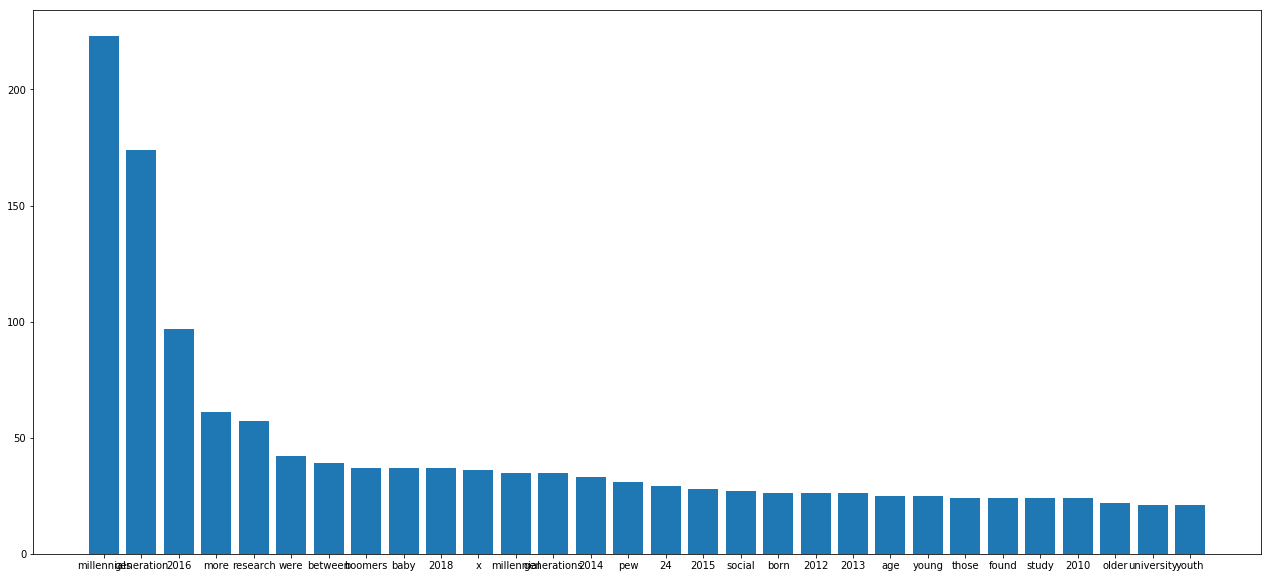

<Figure size 1760x800 with 0 Axes>

In [60]:
blah.plotwords(30)

In [61]:
singapore = wiki('Singapore')
singapore.summary(4)

Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


Singapore (/ˈsɪŋ(ɡ)əpɔːr/ (listen)), officially the Republic of Singapore (Malay: Republik Singapura; Chinese: 新加坡共和国; Tamil: சிங்கப்பூர் குடியரசு), is an  island city-state in Southeast Asia. It lies one degree (137 kilometres or 85 miles) north of the equator at the southern tip of the Malay Peninsula with Indonesia's Riau Islands to the south and Peninsular Malaysia to the north. Singapore's territory consists of one main island along with 62 other islets. Since independence, extensive land reclamation has increased its total size by 23% (130 square kilometres or 50 square miles). The country is known for its transition from a developing to a developed one in a single generation under the leadership of its founding father, Lee Kuan Yew.
 

In 1819, Sir Stamford Raffles founded colonial Singapore as a trading post of the British East India Company. After the company's collapse in 1858, the

In [62]:
singapore.HELP()

The wiki() class accepts 3 arguments. The first one is a compulsory title of the Wikipedia page with spaces allowed. The other two are optional numbers

commonwords accepts 1 optional argument (default: 100) for the number of most common words in the site to show

commonwordspct accepts 1 optional argument (default: 10) on the percentage threshold of word count to determine the most common words

plotwords accepts 1 optional argument (default: 20) for the number of most common words to show as a GRAPH

totalwords accepts 0 arguments and shows the total word count and unique word count

summary accepts 1 optional argument for the number of paragraphs (default: 2) and gives a summary of the Wikipedia page

gettext accepts 0 arguments and retrieves the full text of the Wikipedia title



In [63]:
singapore.commonwords(200)

{'singapore': 574, '2011': 157, 'original': 138, '2015': 97, '2016': 84, 'world': 81, '2010': 72, 'singapores': 62, 'times': 58, 'education': 56, '2018': 54, 'national': 54, 'were': 53, '–': 52, 'pdf': 52, 'international': 48, 'english': 48, 'straits': 47, 'country': 46, 'ministry': 46, 'british': 45, 'government': 45, 'language': 45, 'asia': 44, 'island': 42, '2017': 41, '13': 41, 'malaysia': 40, '2007': 40, 'islands': 39, 'countries': 39, '18': 39, 'isbn': 39, '27': 38, 'press': 38, 'chinese': 37, 'singapore:': 36, 'worlds': 35, '2014': 35, 'foreign': 34, '2013': 34, 'malay': 33, 'public': 33, 'been': 32, 'economic': 32, 'population': 32, '15': 32, '2008': 32, '2006': 32, 'lee': 31, 'development': 31, '12': 31, '16': 31, '2009': 31, '2': 31, 'singaporean': 30, 'statistics': 30, '5': 29, 'city': 28, '2012': 28, 'global': 27, '11': 27, 'singaporeans': 27, 'nations': 27, 'asean': 26, '6': 26, 'united': 26, 'asian': 25, 'index': 25, '7': 24, '17': 24, 'history': 23, 'top': 22, 'best': 22

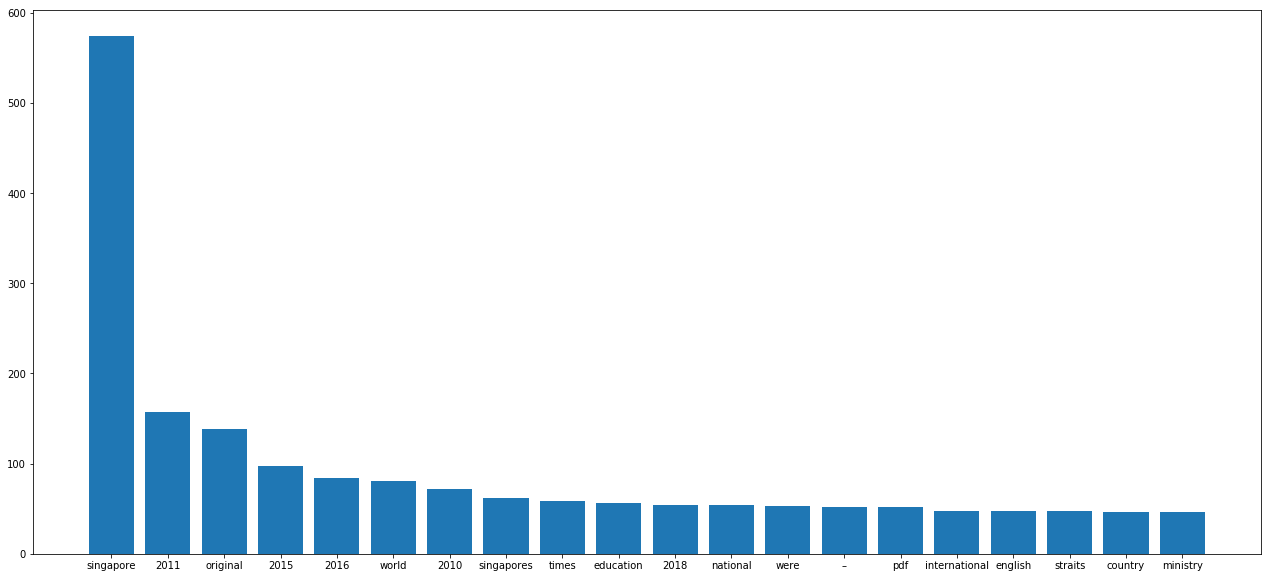

<Figure size 1760x800 with 0 Axes>

In [64]:
singapore.plotwords(20)

In [66]:
thespacebrothers = wiki('the space brothers')

Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


In [69]:
dumonde = wiki('DuMonde')


The title "Dumonde" you specified is ambiguous. As a result, you are linked to a clarification page.


Here are some suggestions to use: 

DuMonde
Lee DuMonde
Renée DuMonde
